In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
import json

with open('predicted_scores.json') as f:
    pred_data = json.load(f)

with open('real_scores.json') as f:
    real_data = json.load(f)


In [6]:
selected_metrics = ['LPIPS', 'mdsi', 'vsi', 'ContentLoss', 'dss', 'DISTS']

df_sd = pd.DataFrame(columns=['Quality', 'Authenticity', 'Correspondence', *selected_metrics])
df_mj = pd.DataFrame(columns=['Quality', 'Authenticity', 'Correspondence', *selected_metrics])

for model in pred_data.keys():
    if model == 'SD':
        for i in range(len(pred_data[model]['psnr'])):
            row = {
                'Quality': real_data[model]['Quality'][i],
                'Authenticity': real_data[model]['Authenticity'][i],
                'Correspondence': real_data[model]['Correspondence'][i],
            }
            for metric in selected_metrics:
                row[metric] = pred_data[model][metric][i]
            df_sd = df_sd._append(row, ignore_index=True)
    else:
        for i in range(len(pred_data[model]['psnr'])):
            row = {
                'Quality': real_data[model]['Quality'][i],
                'Authenticity': real_data[model]['Authenticity'][i],
                'Correspondence': real_data[model]['Correspondence'][i],
            }
            for metric in selected_metrics:
                row[metric] = pred_data[model][metric][i]
            df_mj = df_mj._append(row, ignore_index=True)
        




# for model in pred_data.keys():
#     if model == 'SD':
#         for i in range(len(pred_data[model]['psnr'])):
#             df_sd = df_sd._append({
#                 'Quality': real_data[model]['Quality'][i],
#                 'Authenticity': real_data[model]['Authenticity'][i],
#                 'Correspondence': real_data[model]['Correspondence'][i],
#                 'psnr': pred_data[model]['psnr'][i],
#                 'ssim': pred_data[model]['ssim'][i],
#                 'multi_scale_ssim': pred_data[model]['multi_scale_ssim'][i],
#                 'information_weighted_ssim': pred_data[model]['information_weighted_ssim'][i],
#                 'vif_p': pred_data[model]['vif_p'][i],
#                 'fsim': pred_data[model]['fsim'][i]
#             }, ignore_index=True)
#     else:
#         for i in range(len(pred_data[model]['psnr'])):
#             df_mj = df_mj._append({
#                 'Quality': real_data[model]['Quality'][i],
#                 'Authenticity': real_data[model]['Authenticity'][i],
#                 'Correspondence': real_data[model]['Correspondence'][i],
#                 'psnr': pred_data[model]['psnr'][i],
#                 'ssim': pred_data[model]['ssim'][i],
#                 'multi_scale_ssim': pred_data[model]['multi_scale_ssim'][i],
#                 'information_weighted_ssim': pred_data[model]['information_weighted_ssim'][i],
#                 'vif_p': pred_data[model]['vif_p'][i],
#                 'fsim': pred_data[model]['fsim'][i]
#             }, ignore_index=True)

df_sd

/tmp/ipykernel_1442312/2959147339.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_sd = df_sd._append(row, ignore_index=True)
/tmp/ipykernel_1442312/2959147339.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_mj = df_mj._append(row, ignore_index=True)


,Quality,Authenticity,Correspondence,LPIPS,mdsi,vsi,ContentLoss,dss,DISTS
0,1.7100,1.4086,3.5814,0.666134,0.549442,0.816987,5947.951172,0.177869,0.273069
1,2.1633,1.7220,3.8333,0.599519,0.562508,0.813565,6957.454102,0.137525,0.273126
2,2.2250,1.7640,4.0167,0.643470,0.517516,0.828485,5074.471191,0.184107,0.267546
3,2.1125,1.5317,3.4871,0.627443,0.530654,0.810141,5466.399902,0.169315,0.279271
4,3.3580,3.0150,3.3725,0.593427,0.461026,0.860469,3966.859863,0.235352,0.245196
...,...,...,...,...,...,...,...,...,...
795,3.5220,3.3637,2.5614,0.584285,0.516275,0.839035,4330.748047,0.096022,0.284159
796,2.1780,2.3900,3.3240,0.733774,0.473235,0.828950,5166.476074,0.131326,0.293916
797,2.4043,1.8583,2.7333,0.714463,0.518778,0.828536,5835.659180,0.123641,0.264022
798,2.0175,1.5440,3.2483,0.772784,0.504236,0.826802,5035.968750,0.129515,0.337195


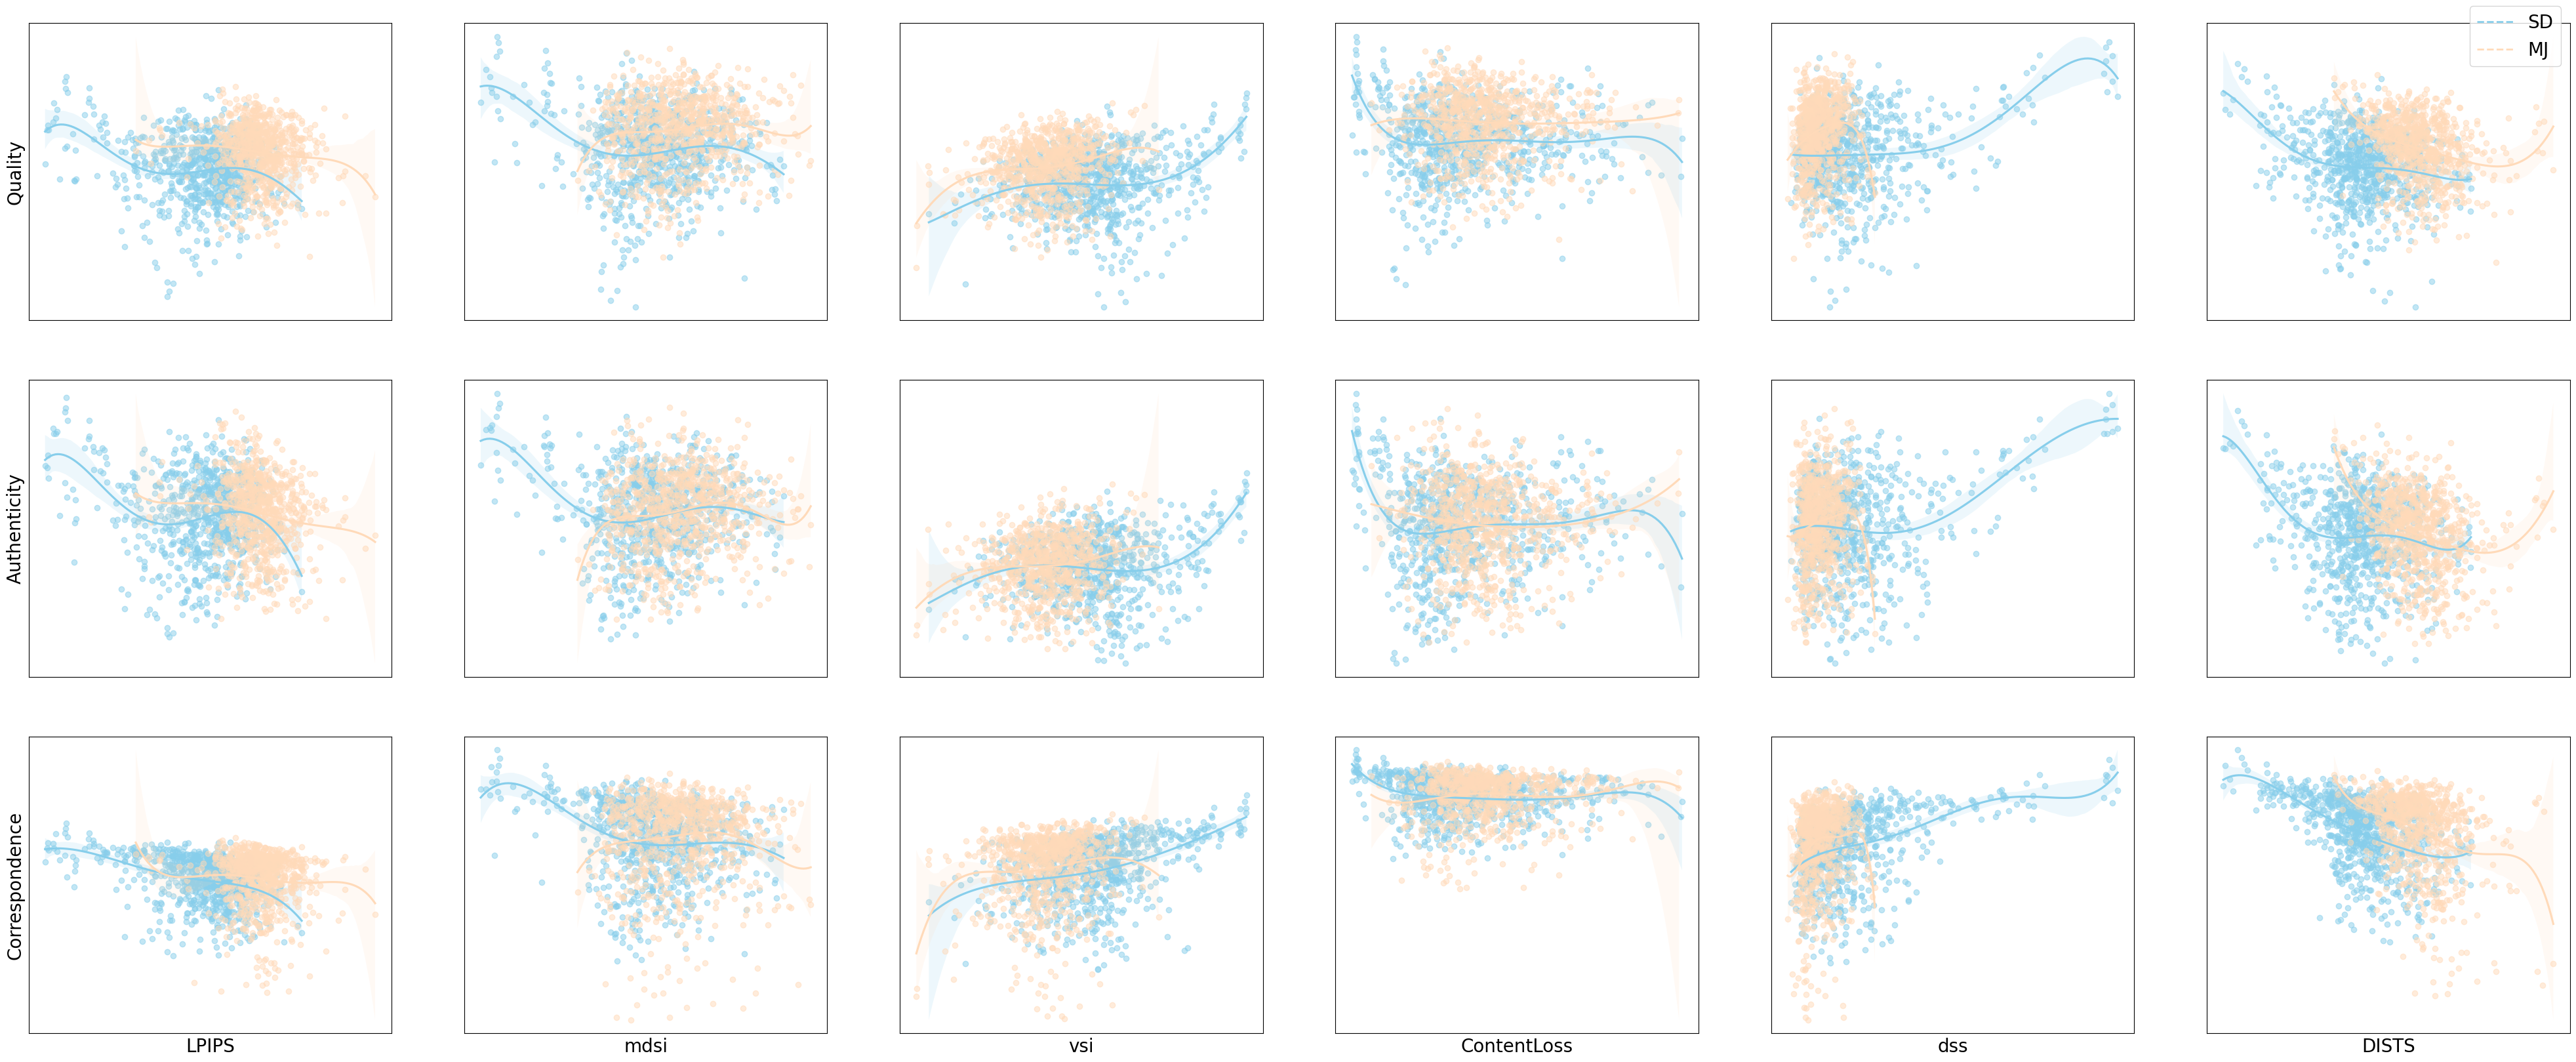

In [12]:
from scipy.optimize import curve_fit
import numpy as np

fig, ax = plt.subplots(3, 6, figsize=(50, 20))

def logistic_function(x, beta1, beta2, beta3, beta4, beta5):
    return beta1 * (0.5 - 1 / (1 + np.exp(beta2 * (x - beta3)))) + beta4 * x + beta5

selected_metrics = ['LPIPS', 'mdsi', 'vsi', 'ContentLoss', 'dss', 'DISTS']
selected_gt = ['Quality', 'Authenticity', 'Correspondence']

handles, labels = [], []
colors = ['skyblue', 'peachpuff']
groups = ['SD', 'MJ']

for i, group in enumerate(groups):
    handles.append(plt.Line2D([0], [0], color=colors[i], linewidth=2, linestyle='dashed'))
    labels.append(group)

fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.9, 0.9), fontsize=20)

mj_covs = []
sd_covs = []

common_kwargs = {
    # 'logistic': True,
    'order': 5,
    'scatter_kws': {'alpha': 0.5},
}

for i in range(3):
    for j in range(6):
        sns.regplot(x=selected_metrics[j], y=selected_gt[i], data=df_sd, ax=ax[i, j], color='skyblue', label='SD', **common_kwargs)
        sns.regplot(x=selected_metrics[j], y=selected_gt[i], data=df_mj, ax=ax[i, j], color='peachpuff', label='MJ', **common_kwargs)
        
        # sns.scatterplot(x=selected_metrics[j], y=selected_gt[i], data=df_sd, ax=ax[i, j], color='blue', label='SD', legend=False, alpha=0.5)
        # sns.scatterplot(x=selected_metrics[j], y=selected_gt[i], data=df_mj, ax=ax[i, j], color='orange', label='MJ', legend=False, alpha=0.5)

        # popt, pcov = curve_fit(logistic_function, df_sd[selected_metrics[j]], df_sd[selected_gt[i]], maxfev=10000)
        # ax[i, j].plot(df_sd[selected_metrics[j]], logistic_function(df_sd[selected_metrics[j]], *popt), color='blue', linestyle='dashed')
        # sd_covs.append(pcov)

        # popt, pcov = curve_fit(logistic_function, df_mj[selected_metrics[j]], df_mj[selected_gt[i]], maxfev=10000)
        # ax[i, j].plot(df_mj[selected_metrics[j]], logistic_function(df_mj[selected_metrics[j]], *popt), color='orange', linestyle='dashed')
        # mj_covs.append(pcov)

        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        if i == 2:
            ax[i, j].set_xlabel(selected_metrics[j], fontsize=20)
            # ax[i, j].set_xticks(np.arange(min(df_sd[selected_metrics[j]]), max(df_sd[selected_metrics[j]]), step=5))
        if j == 0:
            ax[i, j].set_ylabel(selected_gt[i], fontsize=20)
            # ax[i, j].set_yticks(np.arange(min(df_sd[selected_gt[i]]), max(df_sd[selected_gt[i]]), step=5)) 

plt.show()


In [12]:
mj_covs = np.array(mj_covs)
sd_covs = np.array(sd_covs)

print('SD')
print(np.mean(sd_covs, axis=0))

print('MJ')
print(np.mean(mj_covs, axis=0))

SD
[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
MJ
[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
